In [45]:
import pyLDAvis
import pyLDAvis.sklearn

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from glob import glob

from bagel import DataSet, DataFile

import matplotlib.pyplot as plt
import numpy
import seaborn

In [46]:
FILE_PATTERN = 'zero-carbon-bill/input/*.json'
TOKEN_PATTERN = r'\b[a-zA-ZāēīōūĀĒĪŌŪ]{3,}\b'

# Tweak this parameter until it brings joy
NUMBER_OF_TOPICS = 5

FILE_PATTERN = 'zero-carbon-bill/input/*.json'
# FILE_PATTERN = 'test-data/*.txt'

data_set = DataSet(FILE_PATTERN)


In [47]:
pyLDAvis.enable_notebook()

In [48]:
# raw_texts: the actual text of the files
# filenames: a list of filenames


filenames = glob(FILE_PATTERN)

print("We have {num} files to read".format(num=len(filenames)))

We have 599 files to read


In [49]:
# # Import the wordcloud library
# from wordcloud import WordCloud

# # Join the different processed titles together.
# long_string = ','.join(list(data_set.all_input_data))

# # Create a WordCloud object
# wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# # Generate a word cloud
# wordcloud.generate(long_string)
# # Visualize the word cloud
# wordcloud.to_image()

In [53]:
# Converts the documents into a matrix of features
# features are interesting words
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

vectorizer = TfidfVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = TOKEN_PATTERN,
                                max_df = 0.5, 
                                min_df = 2,
                                input = 'filename')

# vectorizer =  CountVectorizer(strip_accents = 'unicode',
#                                 stop_words = 'english',
#                                 lowercase = True,
#                                 token_pattern = r'\b[a-zA-Zā]{3,}\b',
#                                 max_df = 0.5, 
#                                 min_df = 2,
#                                 input = 'filename')

# this is a DTM - document-term matrix
vectorized_data = vectorizer.fit_transform(data_set.filenames)


zero-carbon-bill/input/01290_Lindsay_Brown_Redacted.pdf.txt.json


ValueError: max_df corresponds to < documents than min_df

In [12]:
# Helper function
NUMBER_OF_WORDS = 50

words = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print("\nTopic {}:".format(topic_idx+1))
    topic_words = [words[i] for i in topic.argsort()[:-NUMBER_OF_WORDS - 1:-1]]
    print(" ".join(topic_words))
    files = list(data_set.files_with_words(topic_words))
    print("{} files".format(len(files)))



Topic 1:
let carbon website zero important climate change submission ministry environment strongly consent support thank zealand transparency new government global precious effective future assist neutral emissions act economic consulting mandated serve issue human recycling https need published fantastic consequences improve summary risk temperature planet come clean requirements based details submissions reporting
537 files

Topic 2:
carbon emissions just change need climate electric zero government new future tax cars economy needs power world use country make countries focus like net reduce incentives used vehicles way moment zealand people reducing solar planet energy current costs reporting support electricity legislation global animal term time agriculture farmers public renewable
528 files

Topic 3:
climate change new emissions important future government need zealand action time world waste carbon zero issue needs money support let process years commission don work make peopl

In [11]:
lda = LatentDirichletAllocation(n_components=NUMBER_OF_TOPICS)
lda.fit(vectorized_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

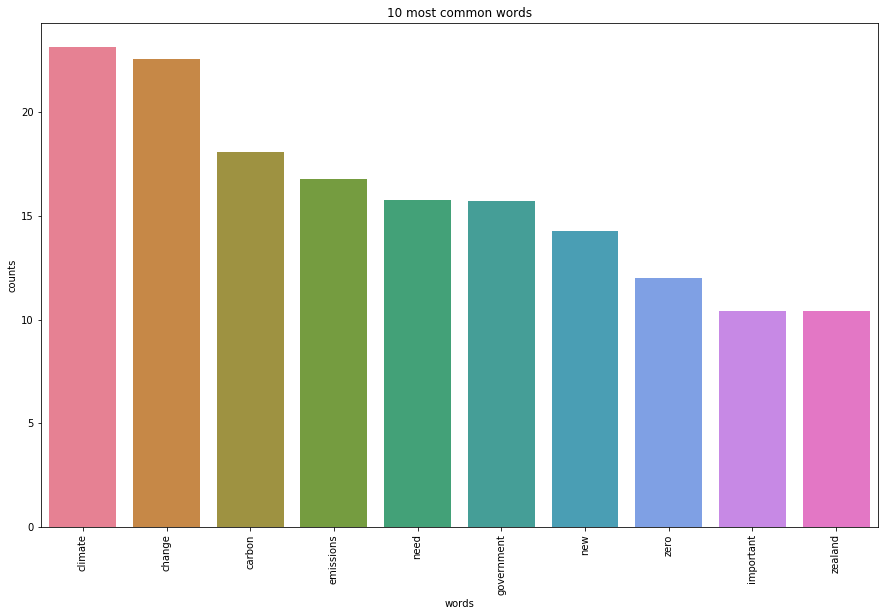

In [13]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = numpy.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = numpy.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    seaborn.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    seaborn.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Visualise the 10 most common words
plot_10_most_common_words(vectorized_data, vectorizer)


In [28]:
# NOTE: This step takes a long while to return
prepared_data = pyLDAvis.sklearn.prepare(lda, vectorized_data, vectorizer)
prepared_data

/home/brenda/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.054490  0.004766       1        1  39.142139
3     -0.003584 -0.033140       2        1  16.589638
2     -0.013288  0.035864       3        1  15.863246
0     -0.021121  0.005511       4        1  15.076499
1     -0.016496 -0.013001       5        1  13.328478, topic_info=     Category       Freq        Term      Total  loglift  logprob
340   Default  12.000000     climate  12.000000  30.0000  30.0000
1408  Default   2.000000      moment   2.000000  29.0000  29.0000
941   Default   8.000000  government   8.000000  28.0000  28.0000
2393  Default   2.000000       waste   2.000000  27.0000  27.0000
1741  Default   3.000000      public   3.000000  26.0000  26.0000
...       ...        ...         ...        ...      ...      ...
904    Topic5   0.606652      future   6.242683  -0.3159  -6.3602
680    Topic5   0.605268   emissions  10.442447  -0.8327  -6.3625
815    Topic5   0.559575     farming   3.393474   0.2128  -6.4410
27     Topic5   0.551640         act   4.498858  -0.0834  -6.4553
1320   Topic5   0.552885        make   5.513534  -0.2845  -6.4530

[345 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
27        1  0.666836     act
27        3  0.222279     act
27        5  0.222279     act
28        3  0.768037  acting
29        1  0.426419  action
...     ...       ...     ...
2467      1  0.661943    zero
2467      2  0.132389    zero
2467      3  0.132389    zero
2467      4  0.132389    zero
2467      5  0.132389    zero

[311 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2])

In [ ]:
# WAIT here for previous step to return
